In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import the data covert that into a convenient data
PATH= '/home/ac-optimus/data_science/recommendation_sys/ratings_small.csv'
df = pd.read_csv(PATH, sep= ",")
# df = pd.read_csv(PATH, sep= ",")
df.shape

(100004, 4)

In [3]:
df.drop('timestamp', axis=1, inplace=True)
df.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [4]:
# this gave me a good plot
from sklearn.utils import shuffle
df = shuffle(df)

In [5]:
df.head()

,userId,movieId,rating
59524,430,45722,4.0
19195,128,2722,2.0
97450,654,1,5.0
72929,509,3396,4.0
39332,287,1265,4.5


In [6]:
num_rows = df.shape[0]
train, test = df.copy(deep = True), df[int(num_rows*0.8):].copy(deep = True)
train[int(num_rows*0.8):]['rating']  = train[int(num_rows*0.8):]['rating']*0
train = shuffle(train)

<ipython-input-6-75ff325d5135>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[int(num_rows*0.8):]['rating']  = train[int(num_rows*0.8):]['rating']*0


In [7]:
user_movie_rating =train.groupby(['userId','movieId'])['rating'].max().unstack().fillna(0)
user_movie_rating.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
central_mean = user_movie_rating.sub(user_movie_rating.mean(axis=1), axis=0)
central_mean.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.004302,-0.004302,-0.004302,-0.004302,-0.004302,-0.004302,-0.004302,-0.004302,-0.004302,-0.004302,...,-0.004302,-0.004302,-0.004302,-0.004302,-0.004302,-0.004302,-0.004302,-0.004302,-0.004302,-0.004302
2,-0.023053,-0.023053,-0.023053,-0.023053,-0.023053,-0.023053,-0.023053,-0.023053,-0.023053,3.976947,...,-0.023053,-0.023053,-0.023053,-0.023053,-0.023053,-0.023053,-0.023053,-0.023053,-0.023053,-0.023053
3,-0.016435,-0.016435,-0.016435,-0.016435,-0.016435,-0.016435,-0.016435,-0.016435,-0.016435,-0.016435,...,-0.016435,-0.016435,-0.016435,-0.016435,-0.016435,-0.016435,-0.016435,-0.016435,-0.016435,-0.016435
4,-0.077432,-0.077432,-0.077432,-0.077432,-0.077432,-0.077432,-0.077432,-0.077432,-0.077432,3.922568,...,-0.077432,-0.077432,-0.077432,-0.077432,-0.077432,-0.077432,-0.077432,-0.077432,-0.077432,-0.077432
5,-0.035793,-0.035793,3.964207,-0.035793,-0.035793,-0.035793,-0.035793,-0.035793,-0.035793,-0.035793,...,-0.035793,-0.035793,-0.035793,-0.035793,-0.035793,-0.035793,-0.035793,-0.035793,-0.035793,-0.035793


In [9]:
user_movie_rating.shape
print ("We have {} users in our user-movie matrix.".format(user_movie_rating.shape[0]))
print ("We have {} movies in our user-movie matrix.".format(user_movie_rating.shape[1]))


We have 671 users in our user-movie matrix.
We have 9066 movies in our user-movie matrix.


In [10]:
correlation_matrix = user_movie_rating.T.corr()
correlation_matrix.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.003058,-0.002610,0.046891,0.017377,-0.002221,0.021553,-0.003892,0.013409,-0.002372,...,-0.002660,-0.001888,0.010071,0.049988,-0.002045,-0.002962,-0.001473,-0.002042,-0.001893,0.017701
2,-0.003058,1.000000,0.082918,0.093134,0.102002,-0.004568,0.137468,0.087744,0.055797,0.026017,...,0.334241,0.045125,0.054648,0.119821,0.380384,0.251723,0.061476,-0.004198,0.099583,0.085977
3,-0.002610,0.082918,1.000000,0.027689,0.128341,0.074460,0.114814,0.145082,0.085814,0.084609,...,0.042687,0.026022,0.145799,0.082642,0.083236,0.058529,0.040318,0.017746,0.077093,0.120055
4,0.046891,0.093134,0.027689,1.000000,0.092231,0.044571,0.233731,0.123023,0.029160,0.060432,...,0.074258,0.051429,0.093562,0.220971,0.135981,0.048065,0.042075,0.051576,0.044545,0.150428
5,0.017377,0.102002,0.128341,0.092231,1.000000,0.038906,0.096530,0.100598,0.071603,0.033578,...,0.112835,0.020612,0.085798,0.182194,0.108012,0.032376,0.028707,0.019460,0.027627,0.149910


In [11]:
# person similarity based

# when we want to find a recommendaiton for a user.
# we compute the correlation(cetered cosine or person correlation, making a saperate column would be a good idea)
# with all the users in the utility matrix
# return the top movies that user had not watched yet and recommend that movie
# main aim is to fill the values that is it.
# central_mean.iloc[0].corr(central_mean.iloc[1])
# user_movie_rating= central_mean

In [12]:
def error(y_hat, y):
    # MSE
    y_hat = np.array(y_hat)
    y = np.array(y)
    MSE_ = (y_hat- y)**2
    MSE = MSE_.sum()
    return MSE

### Similarity based

In [13]:
def PredictMovieRating(user_i, movie_i, corr_mat, user_movie_rating, k):
    # for user x
    # rxi = sum over knn (sxy*ryi)/sum over all the knn similarities
    all_neighbours = corr_mat.loc[user_i]
    all_neighbours = all_neighbours.drop(user_i)
    topk_neighbours = all_neighbours.sort_values(ascending=False)[:k]  # knn
    # knn user ids
    knn = topk_neighbours.index.tolist()
#     return knn
    sum_sim = sum([corr_mat[user_i][user_j] for user_j in knn])
    weighted_sum_sim = sum([corr_mat[user_i][user_j]*user_movie_rating[movie_i][user_j] 
                           for user_j in knn])
    predicted_rating = weighted_sum_sim/sum_sim
    return predicted_rating

In [14]:
y_hat = []
for i in test.index:
    user_i, movie_j = map(int,[ test.loc[i]['userId'], test.loc[i]['movieId']])
    # make the prediction here
    predicted_rating = PredictMovieRating(user_i, movie_j, correlation_matrix, user_movie_rating, 4)
    y_hat.append(predicted_rating)

# compute the error here.


In [15]:
y= test['rating'].tolist()

In [16]:
# compute error
error(np.nan_to_num(np.array(y_hat)), y)

166392.77632292098

In [17]:
# to compute error
# create a new matrix that has ratings based on similarities 
# compare with the y and yhat and get the error
# we can use the same split of test and train as in assignment.

In [18]:
%%time

# looking for optimal k
y= test['rating']
errors = {}
for k in range(1, 40):
    y_hat = []
    for i in test.index:
        user_i, movie_j = map(int,[test.loc[i]['userId'], 
                                   test.loc[i]['movieId']])
        # make the prediction here
        predicted_rating = PredictMovieRating(user_i, 
                                              movie_j, 
                                              correlation_matrix, 
                                              user_movie_rating, k)
        y_hat.append(predicted_rating)
    error_i = error(np.nan_to_num(np.array(y_hat)), y)        
    errors[k]=error_i


CPU times: user 27min 49s, sys: 2.69 s, total: 27min 52s
Wall time: 28min 11s


Text(0.5, 1.0, 'optimal neighbour search')

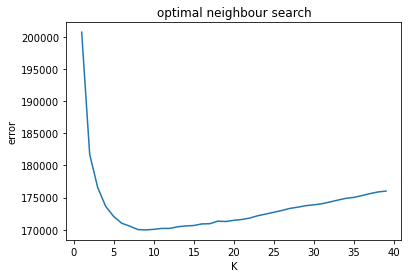

In [19]:
plt.plot(errors.keys(), errors.values())
plt.xlabel('K')
plt.ylabel('error')
plt.title('optimal neighbour search')

In [17]:
# Similarity based
# we have to keep  a correlation matrix. we can say that we update this on regular intervals
# use the prediction formulae given in the video
# here we need k nearest neighbours based on whome we can make a prediction
# how do we decide k?
# def PredictMovieRating(user_i, movie_i, corr_mat, user_movie_rating):
#     # for user x
#     # rxi = sum over knn (sxy*ryi)/sum over all the knn similarities
#     all_neighbours = corr_mat.iloc[user_i]
#     all_neighbours.drop(user_i)
#     topk_neighbours = all_neighbours.sort()[:k]  # knn
#     # knn user ids
#     knn = topk_neighbours.index.tolist()
    
#     sum_sim = sum([corr_mat[user_i][user_j] for user_j in knn])
#     weighted_sum_sim = sum([corr_mat[user_i][user_j]*user_movie_rating[user_j][movie_i] 
#                            for user_j in knn])
#     predicted_rating = weighted_sum_sim/sum_sim
#     return predicted_rating
    
def Prediction(user_i, intial_mat, user_movie_rating, corr_mat):
    # return a list of movieIds as prediction
    # we wont populate user_movie_rating here, let the user do that after he has watched the movie
    predicted_ratings = []  # a heap
    movieIds = intial_mat.columns()
    for movieId in movieIds:
        if intial_mat[user_i][movieId] == 'Null': # check if null value
            # time to predict rating for this movie
            rating = PredictMovieRating(user_i, movieId, corr_mat, user_movie_rating)
            predicted_ratings.append((rating, movieId))
    predicted_ratings.sort(key= lambda x:x[0])
    movie_predictions = [x[1] for x in predicted_ratings]
    return movie_predictions


### Optimal K=8

In [18]:
%%time
# looking for optimal k
y= test['rating']
errors = {}
y_hat = []
for i in test.index:
    user_i, movie_j = map(int,[test.loc[i]['userId'], 
                               test.loc[i]['movieId']])
    # make the prediction here
    predicted_rating = PredictMovieRating(user_i, 
                                          movie_j, 
                                          correlation_matrix, 
                                          user_movie_rating, 8)
    y_hat.append(predicted_rating)
error_i = error(np.nan_to_num(np.array(y_hat)), y)        


CPU times: user 36.8 s, sys: 71.5 ms, total: 36.8 s
Wall time: 38 s


In [19]:
y= test['rating'].tolist()
# compute error
error(np.nan_to_num(np.array(y_hat)), y)

164424.5659923176

In [20]:
# Pred
error(y_hat, test['rating'])

164424.5659923176

In [21]:
test['prediction'] = y_hat
test.head()

,userId,movieId,rating,prediction
23841,168,608,5.0,1.666370
84676,564,3961,3.0,0.000000
90720,602,1009,4.0,0.000000
12894,82,367,3.0,1.492416
97655,654,1562,3.0,0.069885


In [22]:
from collections import Counter
user_freq_dict = Counter(test['userId'].tolist())
max_voting = max(user_freq_dict.values())
for i in user_freq_dict:
    if user_freq_dict[i] == max_voting:
        user_choice =i

In [23]:
one_user= test.loc[(test['userId'] == user_choice)].sort_values('rating', 
                      inplace=False, 
                      ascending=False)
one_user.head()

,userId,movieId,rating,prediction
78613,547,926,5.0,3.100563
79112,547,2797,5.0,2.698605
78682,547,1104,5.0,1.308785
79775,547,6662,5.0,1.420368
79852,547,7087,5.0,0.000000


### Recall and Precision

In [24]:
relevance_threshold = 2
recommended_movies = set(one_user.loc[(one_user['prediction'] >= relevance_threshold)]['movieId'].tolist())
relavent_movies = set(one_user.loc[(one_user['rating'] >= relevance_threshold)]['movieId'].tolist())
len(relavent_movies), len(recommended_movies)

(437, 34)

In [25]:
recommended_movies_intersection_relavant_movies = [i for i in recommended_movies if i in relavent_movies]
recommended_movies_intersection_relavant_movies;

In [26]:
len(recommended_movies), len(recommended_movies_intersection_relavant_movies), len(relavent_movies)

(34, 34, 437)

In [27]:
recall = len(recommended_movies_intersection_relavant_movies)/len(relavent_movies)
precision = len(recommended_movies_intersection_relavant_movies)/len(recommended_movies)

In [28]:
precision, recall

(1.0, 0.07780320366132723)

In [29]:
f_score = 2*precision*recall/(precision+recall)
f_score

0.14437367303609341

### Recall@k and Precision@k
- recall and precision on top k predictions

In [30]:
k=8
top_k_predictions_df = one_user.sort_values('prediction', ascending=False)[:k]
top_k_predictions_df.head()

,userId,movieId,rating,prediction
78490,547,296,5.0,3.716985
79393,547,3996,4.0,3.362366
79250,547,3317,4.0,3.133541
78613,547,926,5.0,3.100563
78764,547,1276,4.5,3.092090


In [31]:
relevance_threshold=3.5
top_k_movies_recommended = set(top_k_predictions_df.loc[(top_k_predictions_df['prediction'] >= relevance_threshold)]['movieId'].tolist())
top_k_movies_relevant = set(top_k_predictions_df.loc[(top_k_predictions_df['rating'] >= relevance_threshold)]['movieId'].tolist())
# top_k_predictions_df['rating']

In [32]:
recommended_movies_intersection_relavant_movies = [i for i in top_k_movies_recommended
                                                   if i in top_k_movies_relevant]
recommended_movies_intersection_relavant_movies

[296]

In [33]:
len(top_k_movies_recommended), len(recommended_movies_intersection_relavant_movies), len(top_k_movies_relevant)

(1, 1, 8)

In [34]:
recall = len(recommended_movies_intersection_relavant_movies)/len(top_k_movies_relevant)
precision = len(recommended_movies_intersection_relavant_movies)/len(top_k_movies_recommended)

In [35]:
precision, recall

(1.0, 0.125)

In [36]:
f_score = 2*precision*recall/(precision+recall)
f_score

0.2222222222222222